# Quantum Phase Estimation

In [1]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT


def create_qpe_circuit(theta, num_qubits):
    """Creates a QPE circuit given theta and num_qubits."""

    # Step 1: Create a circuit with two quantum registers and one classical register.
    first = QuantumRegister(
        size=num_qubits, name="first"
    )  # the first register for phase estimation
    second = QuantumRegister(
        size=1, name="second"
    )  # the second register for storing eigenvector |psi>
    classical = ClassicalRegister(
        size=num_qubits, name="readout"
    )  # classical register for readout
    qpe_circuit = QuantumCircuit(first, second, classical)

    # Step 2: Initialize the qubits.
    # All qubits are initialized in |0> by default, no extra code is needed to initialize the first register.
    qpe_circuit.x(
        second
    )  # Initialize the second register with state |psi>, which is |1> in this example.

    # Step 3: Create superposition in the first register.
    qpe_circuit.barrier()  # Add barriers to separate each step of the algorithm for better visualization.
    qpe_circuit.h(first)

    # Step 4: Apply a controlled-U^(2^j) black box.
    qpe_circuit.barrier()
    for j in range(num_qubits):
        qpe_circuit.cp(
            theta * 2 * np.pi * (2**j), j, num_qubits
        )  # Theta doesn't contain the 2 pi factor.

    # Step 5: Apply an inverse QFT to the first register.
    qpe_circuit.barrier()
    qpe_circuit.compose(QFT(num_qubits, inverse=True), inplace=True)

    # Step 6: Measure the first register.
    qpe_circuit.barrier()
    qpe_circuit.measure(first, classical)

    return qpe_circuit

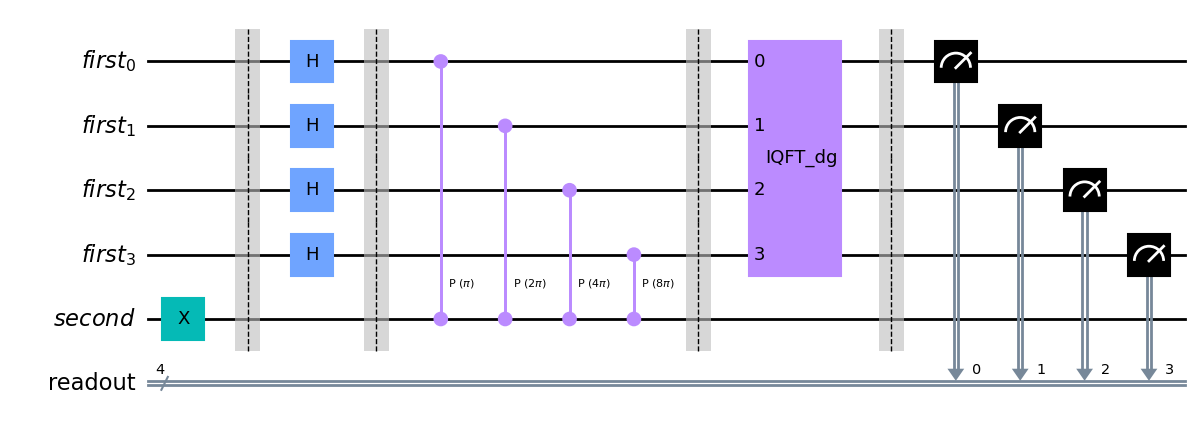

In [2]:
num_qubits = 4
qpe_circuit_fixed_phase = create_qpe_circuit(
    1 / 2, num_qubits
)  # Create a QPE circuit with fixed theta=1/2.
qpe_circuit_fixed_phase.draw("mpl")